# 📝 Pattern Recognition & Biometrics. TP Régression

Par Omar Galarraga et Sonia Garcia

## Étudiants : YOU Borachhun, LE Do Thanh Dat

L'objectif de ce travail pratique est de réaliser des tâches de régression : 

* Linéaire simple
* Multilinéaire (avec et sans régularisation)
* Non linéaire avec réseaux de neurones

Nous voudrons prédire le prix médian des maisons californiennes par quartier en fonction de plusieurs variables quantitatives. 

Commençons par charger les données et regarder la description de la base de données :


In [64]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

* 0.1) Montrez l'histogramme des variables (Piste : *california_housing.frame* contient une DataFrame de Pandas) 

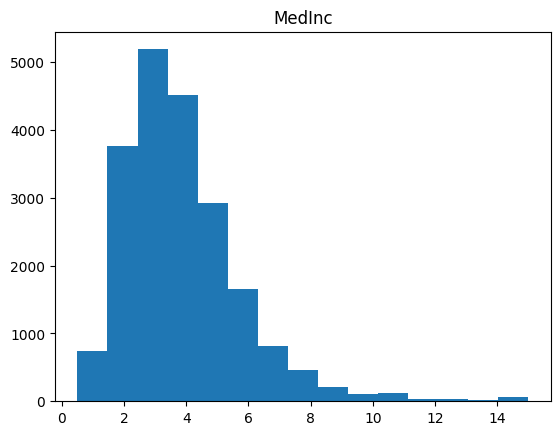

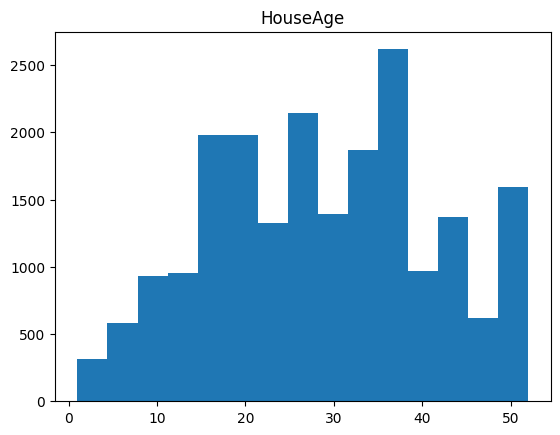

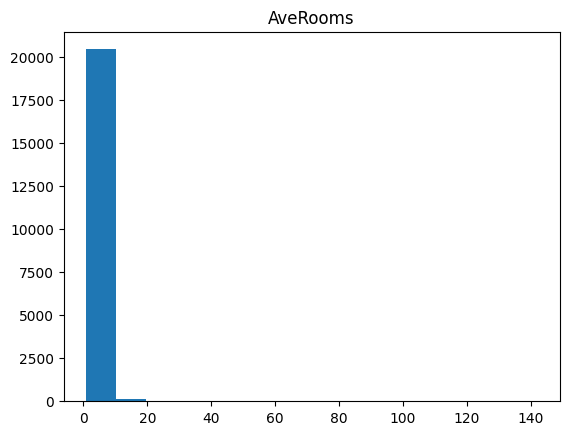

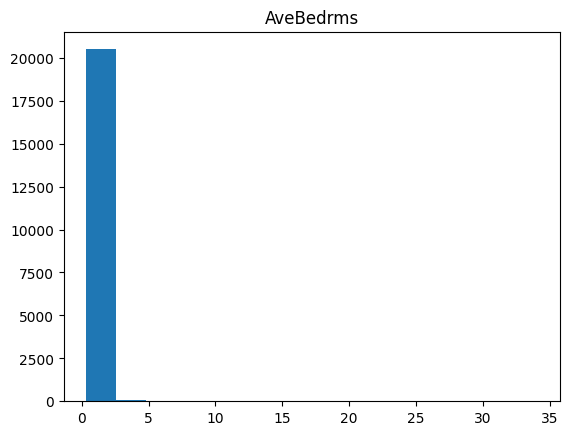

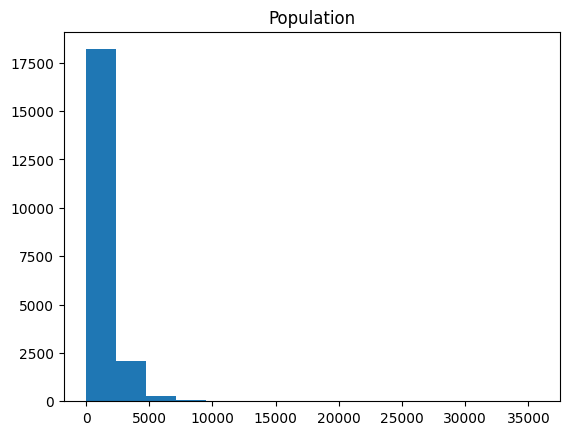

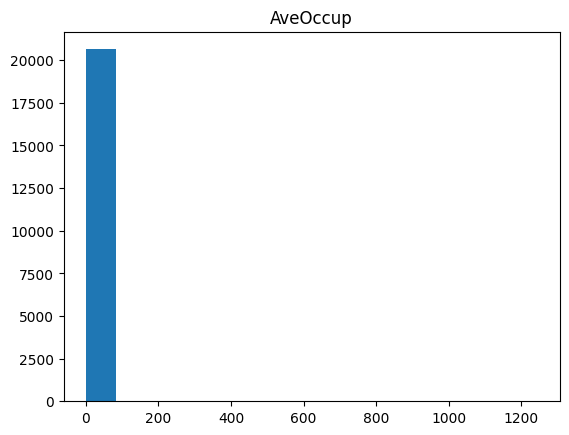

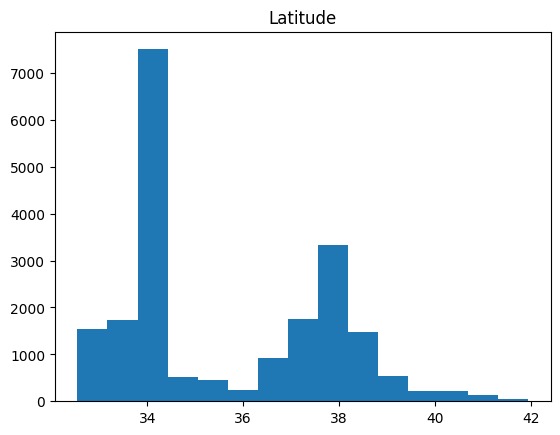

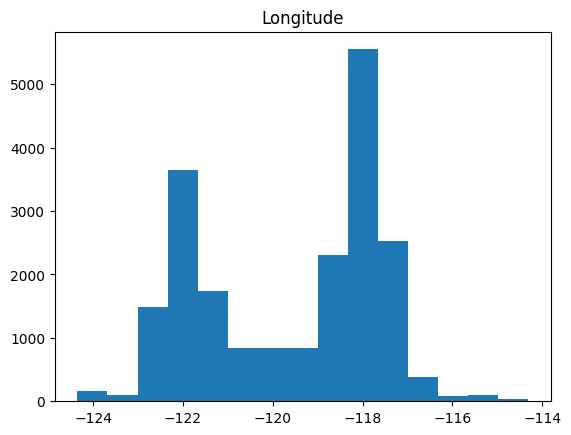

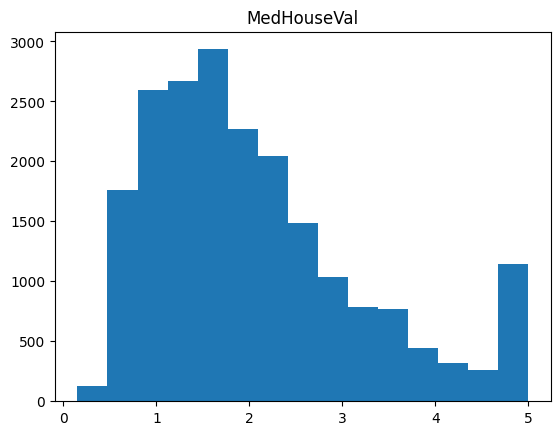

In [65]:
#Ecrivez votre code

import matplotlib.pyplot as plt

df = california_housing.frame

for col in df.columns:
    plt.title(col)
    plt.hist(df[col], bins=15)
    plt.show()

## Partie I. Régression linéaire simple

Calculez la matrice de corrélations.

* I.1) Si vous deviez choisir une seule variable pour réaliser une régression linéaire simple, laquelle choisiriez-vous ? Pourquoi ? 

_Answer: Based on the correlation matrix, the best explanatory variable would be `MedInc` because its correlation with `MedHouseVal` is the closest to +1 or -1._

<Axes: title={'center': 'Correlation matrix'}>

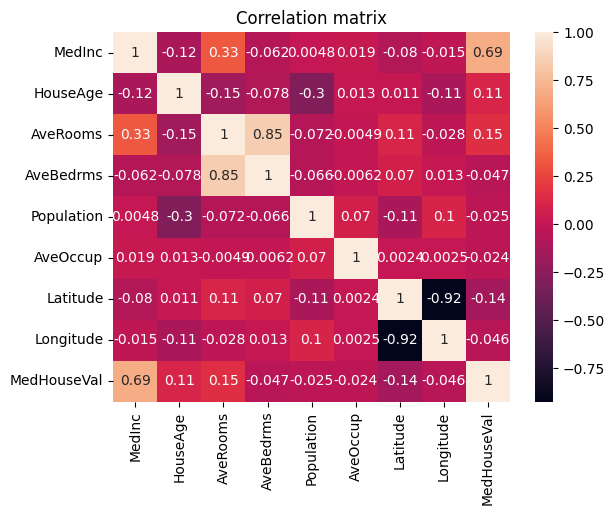

In [66]:
#Ecrivez votre code ici

import seaborn as sns

plt.title('Correlation matrix')
sns.heatmap(df.corr(), annot=True)

Nous voudrons créer un modèle $ \hat{y} = ax + b $, où $ \hat{y} $ est la prédiction du prix médian des maisons par quartier et $x$ est la caractéristique choisie en I.1.

* I.2) Quelles sont les valeurs optimales de $ a $ et $ b $ ? 

In [67]:
#Ecrivez votre code ici

from sklearn.linear_model import LinearRegression

x = df['MedInc'].to_numpy().reshape(-1,1)
y = df['MedHouseVal']

reg = LinearRegression().fit(x, y)

print('a =', reg.coef_[0])
print('b =', reg.intercept_)

a = 0.41793849201896277
b = 0.45085576703267893


* I.3) Quelle est la valeur de $R^2$ ? Est-ce un bon ajustement ? Commentez

_Answer: The R-squared value is far from 1. Thus, this is not a good predictive model._

In [68]:
#Ecrivez votre code ici

print('R-squared =', reg.score(x, y))

R-squared = 0.47344749180719903


* I.4) Tracez la courbe de régression sur le nuage de points entre la sortie désirée et l'entrée

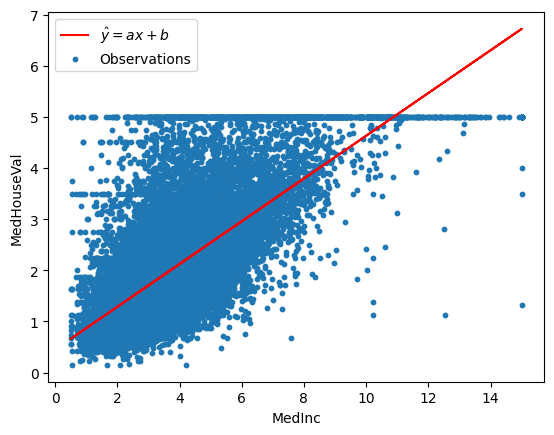

In [69]:
#Ecrivez votre code ici

a = float(reg.coef_[0])
b = float(reg.intercept_)

plt.plot(df['MedInc'], [a*i+b for i in df['MedInc']], color='red', label = '$\hat{y} = ax+b$')
plt.scatter(df['MedInc'], df['MedHouseVal'], s=10, label='Observations')
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.legend()

* I.5) Quelle est l'erreur RMS de prédiction ? (en moyenne sur toutes les observations)

In [70]:
#Ecrivez votre code ici

from sklearn.metrics import mean_squared_error

print('RMSE:', mean_squared_error(y, reg.predict(x), squared=False))

RMSE: 0.8373357452616917


## Partie II. Régression multilinéaire

Maintenant réalisez une régression linéaire en utilisant toutes les caractéristiques disponibles. 

* II.1) Quelle est l'erreur de prédiction ?

In [71]:
#Ecrivez votre code ici

X_multiple = df.drop(['MedHouseVal'], axis=1)

reg_multiple = LinearRegression().fit(X_multiple, y)

print('RMSE:', mean_squared_error(y, reg_multiple.predict(X_multiple), squared=False))

RMSE: 0.7241001216576387


* II.2) Quelle est la valeur de $R^2$ ? L'ajustement est-il meilleur qu'avec une seule variable d'entrée ?

_Answer: The value of R-squared in this case is closer to 1 compared to the previous case, meaning that this model is better._

In [72]:
#Ecrivez votre code ici

print('R-squared =', reg_multiple.score(X_multiple, y))

R-squared = 0.606232685199805


* II.3) Quels sont les coefficients associés aux variables d'entrée, ainsi que le terme indépendant ?

In [73]:
#Ecrivez votre code ici

for i in range(len(reg_multiple.feature_names_in_)):
    print(reg_multiple.feature_names_in_[i], ':', reg_multiple.coef_[i])
print('Intercept', ':', reg_multiple.intercept_)

MedInc : 0.4366932931343245
HouseAge : 0.009435778033237972
AveRooms : -0.10732204139090447
AveBedrms : 0.645065693519812
Population : -3.976389421211576e-06
AveOccup : -0.003786542654971
Latitude : -0.42131437752714385
Longitude : -0.43451375467477743
Intercept : -36.94192020718441


## Partie III. Régression non linéaire avec réseaux de neurones

Construisez et entraînez un réseau de neurones type Perceptron Multicouche (PMC) à $N_{layer} = 3$ couches et avec $m=5$ neurones dans la couche cachée.

N'oubliez pas de normaliser les données en prétraitement. 

In [74]:
#Ecrivez votre code ici

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

preprocessor = StandardScaler()
norm_data = preprocessor.fit_transform(X_multiple)

m = 5
mlp_model = MLPRegressor(hidden_layer_sizes=(m,m,m), max_iter=1000).fit(norm_data, y)


* III.1) Quelle est l'erreur RMS d'apprentissage ?

In [75]:
#Ecrivez votre code ici

print('RMSE:', mean_squared_error(y, mlp_model.predict(norm_data), squared=False))

RMSE: 0.5585607112705924


* III.2) Pour une validation-croisée type K-Fold avec $K=10$ (mélangez l'ordre des observations), remplissez le tableau de RMSE de test ci-dessous selon les différents types de régression.

| Type de régression | Fold 1 | Fold 2 | Fold 3 | Fold 4 | Fold 5 | Fold 6 | Fold 7 | Fold 8 | Fold 9 | Fold 10 |
|--------------------|---------|--------|--------|-------|--------|-------|---------|--------|--------|---------|
| Linéaire simple    |  |  |  |  |  |  |  |  |  |  |
| Multilinéaire     |  |  |  |  |  |  |  |  |  |  |
| Non linéaire avec NN    |  |  |  |  |  |  |  |  |  |  |


In [76]:
from sklearn.model_selection import KFold, cross_validate

kf = KFold(n_splits=10, shuffle=True)

reg = LinearRegression()
reg_multiple = LinearRegression()
mlp_model = MLPRegressor(hidden_layer_sizes=(m,m,m), max_iter=1000)

cv_reg = cross_validate(reg, x, y, cv=kf, scoring='neg_root_mean_squared_error', return_train_score=True)
cv_reg_multiple = cross_validate(reg_multiple, X_multiple, y, cv=kf, scoring='neg_root_mean_squared_error', return_train_score=True)
cv_mlp_model = cross_validate(mlp_model, norm_data, y, cv=kf, scoring='neg_root_mean_squared_error', return_train_score=True)

rmse_cv_reg = list(map(lambda x: -x, cv_reg['test_score']))
rmse_cv_reg_multiple = list(map(lambda x: -x, cv_reg_multiple['test_score']))
rmse_cv_mlp_model = list(map(lambda x: -x, cv_mlp_model['test_score']))

print('RMSE of simple linear:', rmse_cv_reg)
print('RMSE of multilinear:', rmse_cv_reg_multiple)
print('RMSE of neural network', rmse_cv_mlp_model)

RMSE of simple linear: [0.865902616846088, 0.7937087883400319, 0.829860495391897, 0.8562625451817246, 0.8122500251714481, 0.8573150362464008, 0.8435746246415378, 0.8339471292419393, 0.8511129253029178, 0.8279371466752311]
RMSE of multilinear: [0.7378675988627073, 0.7332847761560833, 0.7220514054001629, 0.7728732298578772, 0.7253175722233215, 0.7098564630885417, 0.6876021530323628, 0.7281517367143827, 0.7415882664881916, 0.7011928338653989]
RMSE of neural network [0.5404948376854605, 0.5966644526080702, 1.1667230915850675, 0.5767700817437419, 0.5755126179087958, 0.5969546391544238, 0.577286037547449, 0.570351925422945, 0.5378889208130373, 0.6253922213780589]


* III.3) Quelle est la méthode de régression la plus adaptée pour ce problème ? Justifiez

_Answer: Neural network is the best model for this problem because it gives the least mean value of RMSE of the cross-validation._

In [77]:
#Ecrivez votre code ici

import numpy as np

print('Mean of RMSE of simple linear:', np.mean(rmse_cv_reg))
print('Mean of RMSE of multilinear:', np.mean(rmse_cv_reg_multiple))
print('Mean of RMSE of neural network:', np.mean(rmse_cv_mlp_model))

Mean of RMSE of simple linear: 0.8371871333039216
Mean of RMSE of multilinear: 0.7259786035689031
Mean of RMSE of neural network: 0.636403882584705
